In [17]:
import numpy as np

import sys

import numpy as np
from time import sleep
import sys
import keras.backend as K

from keras.models import Model, Sequential
import matplotlib.pyplot as plt

import sys
sys.path.append("../")
from IntegratedGradients import *

In [2]:
# MNIST DATA
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

X = np.expand_dims(mnist.train._images.reshape(55000,28, 28), 3)
Y = mnist.train._labels

X1 = X[:,:,:14]
X2 = X[:,:,14:]

print X1.shape

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 28, 14, 1)


# When you have a network with multiple inputs

We have MNIST images split in half as inputs to two CNN arms. 

Step 1: Define and train a model

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Merge, Conv2D, Dropout, MaxPooling2D, Flatten, Input

In [6]:
l_in = Input(shape=(28, 14, 1), )
l = Conv2D(32, kernel_size=(3, 3), activation='relu')(l_in)
l = Conv2D(64, (3, 3), activation='relu')(l)
l = MaxPooling2D(pool_size=(2, 2))(l)
l = Dropout(0.25)(l)

l2_in = Input(shape=(28, 14, 1), )
l2 = Conv2D(32, kernel_size=(3, 3), activation='relu') (l2_in)
l2 = Conv2D(64, (3, 3), activation='relu')(l2)
l2 = MaxPooling2D(pool_size=(2, 2))(l2)
l2 = Dropout(0.25)(l2)

x = keras.layers.concatenate([l, l2])

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x_out = Dense(10, activation='softmax')(x)

model = Model(inputs=[l_in, l2_in], outputs=x_out)
model.compile(optimizer='sgd', loss='categorical_crossentropy')

In [7]:
model.fit([X1, X2], Y, epochs=15, batch_size=128, verbose=0)

In [8]:
predicted = model.predict([X1, X2])

Step 2: Wrap it with integrated gradients.

In [13]:
ig = integrated_gradients(model)

Evaluated output channel (0-based index): All
Building gradient functions
Progress: 100.0%
Done.


Step3: Use explain function to explain. Feed a pair of samples as a list of NumPy ndarrays just like when you train. 

prediction: 7


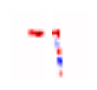

In [19]:
index = np.random.randint(55000)
pred = np.argmax(predicted[index])
print "prediction:", pred

################# Calling Explain() function #############################
ex = ig.explain([X1[index, :, :, :], X2[index, :, :, :]], outc=pred)
##########################################################################

th = max(np.abs(np.min([np.min(ex[0]), np.min(ex[1])])), np.abs(np.max([np.max(ex[0]), np.max(ex[1])])))

plt.figure(figsize=(1,2))
plt.subplot(1, 2, 1)
plt.imshow(ex[0][:,:,0], cmap="seismic", vmin=-1*th, vmax=th)
plt.xticks([],[])
plt.yticks([],[])

plt.subplot(1, 2, 2)
plt.imshow(ex[1][:,:,0], cmap="seismic", vmin=-1*th, vmax=th)
plt.xticks([],[])
plt.yticks([],[])
plt.show()